<a href="https://colab.research.google.com/github/toupasana/Exploratory-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team Members:
    * Upasana Kumari
    * ArunTeja Lonka  
    * Abriti nanda

#Problem Statement:
### Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

## Explore and analyze the data to discover key understandings (not limited to these) such as :
 * What can we learn about different hosts and areas?
 * What can we learn from predictions? (ex: locations, prices, reviews,    etc)
 * Which hosts are the busiest and why?
 * Is there any noticeable difference of traffic among different areas  and what could be the reason for it? </b>

## "I don't guess. I observe and once I've observed, I deduce."
 A Sherlock Holmes quote from the tv series 'Elementary' 

Sherlock Holmes - the famous fictional detective created by British author Sir Arthur Conan Doyle is known for his proficiency with observation, deduction, forensic science, and logical reasoning that borders on the fantastic, which he employs when investigating cases for a wide variety of clients.

This quote itself explains why Holmes is a great detective. Merely guessing from a dataset without observing, cleaning and analysing will lead you to twist facts to suit your own superficial and biased theories. Which is actually what no one is expecting from an analyst, but an eagle eye that drives after its prey.

The process of diving into your given information would rather seem cumbersome, but it's something that is unavoidable and time consuming. So without further due, let's embark on a journey to deduce the key understandings of the Airbnb business model.

## 1.Setting the Stage

In [ ]:
#Load the goodies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Mount the tank
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Supply the energy
airbnb_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Airbnb NYC 2019.csv')


In [ ]:
#Take the first look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Identify different charachteristics of the fuel
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Identify the size
airbnb_df.shape

(48895, 16)

In [ ]:
#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Apparantely, a careful over head examination of the airbnb dataset shows that this set of information is clean to a greater extent with a very few missing values which could be replaced with a '0' or the particular corresponding variable should be removed completely if more than 20% of the data are null values in order to make sure they won't affect with our future analysing. 

# Moving on with the next steps, let's take a sneak peek at the percentages of the null values before we proceed further...

## Looking for the lost souls
* Why look for the null values? - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

  * How ubiquitous are the missing values?
  * Are they random?
  * Do they show a pattern?

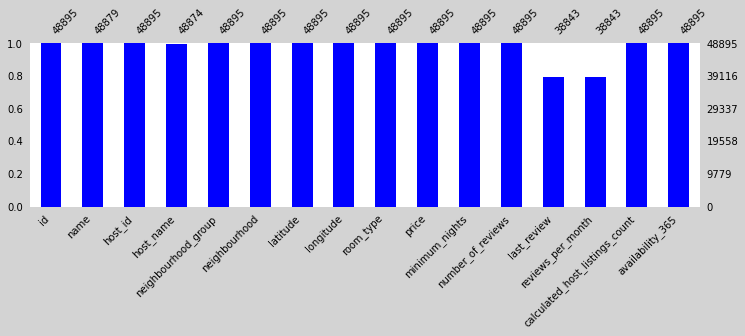

In [ ]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(airbnb_df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

Visible as they are even in the dark! These graphs are insanely handy when hunting for these lost souls, as they provide a clear overall picture of their whereabouts and sizes.

Apparantely, only two of them 'last_review' and 'reviews_per_month' are considerably missing, while values of 'name' and host_name' are negligible. Hence, this set of information is clean to a greater extent and these missing values could be replaced with a '0' or the particular corresponding variable could be removed completely if more than 50% of the data are null values as a rule of thumb in order to make sure they won't affect our future analysis.

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [ ]:
#Dig into the count and percentages
tot_missing = airbnb_df.isnull().sum().sort_values(ascending=False)
percent_missing = (airbnb_df.isnull().sum()* 100 / len(airbnb_df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


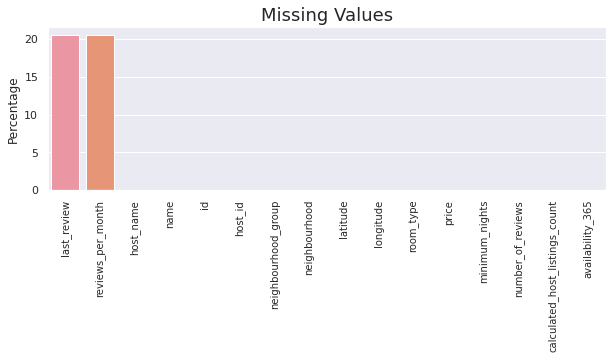

In [ ]:
#Visualize the numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,3)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=90)
plt.show()

Mmmmm...magnificent! This reveals columns "last_review" and "review_per_month" only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

## 3.First Move - Getting rid of the misfits!

## Why remove them? 
Columns "id", "reviews_per_month" and "last_review" are irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [ ]:
#Kick out the misfits
airbnb_df.drop(['id','last_review','reviews_per_month'], axis=1, inplace=True)


In [ ]:
#A quick look at the new results
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy!

But, One more step to go...

## Bringing in the most wanted!

In [ ]:
#Shows the required data
list(airbnb_df.columns)

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#Check the full info of data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

 ##### Finally, we got rid of the noisiness in our dataset and it's ready for further advanced exploration. Ahoy! Let's venture into the unexplored territories!

## Map of Neighbourhood group

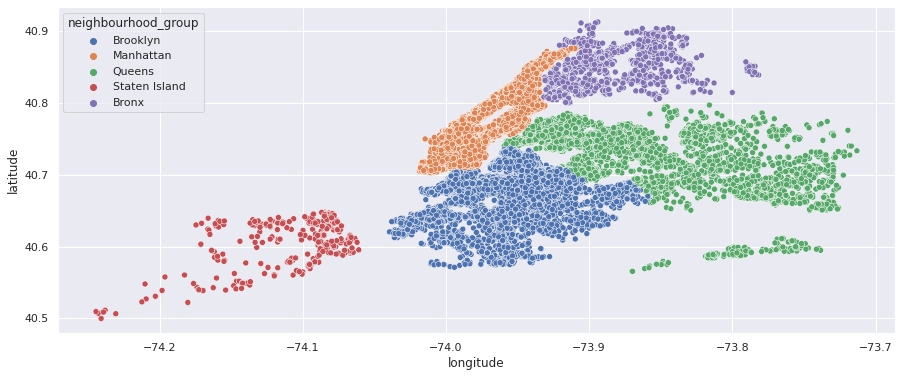

In [ ]:
#Display the neighbourhoods
plt.figure(figsize=(15,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)
plt.ioff()

In [ ]:
#Check the list of neighbourhood_group areas
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

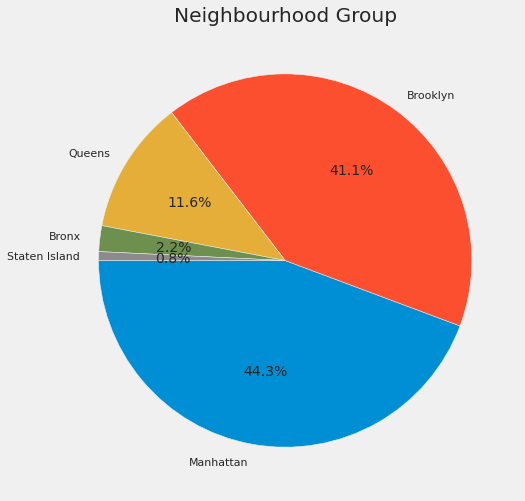

In [ ]:
#Display the all neighbourhoods share of hotals
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

#### The pie chart above shows that Airbnb Listings in Newyork are near Manhattan(44.3%), and Brooklyn(41.1%) has the highest share of hotels. We also know that from this map of Neighborhood Group.

## Availability of Room

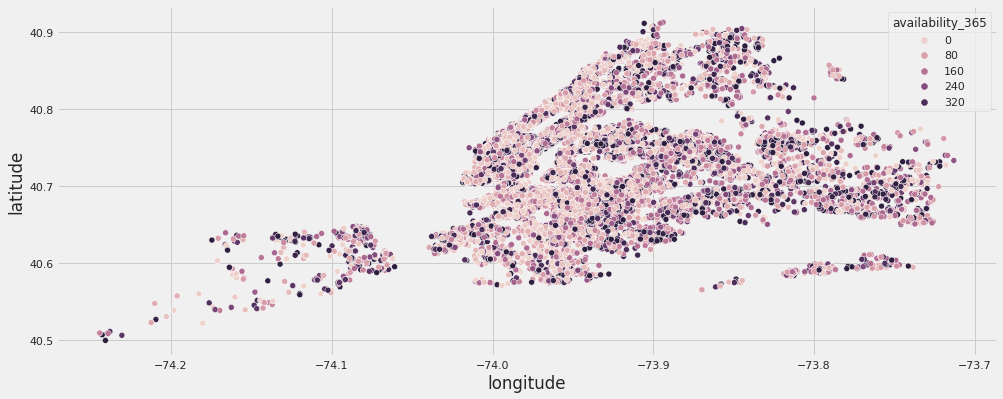

In [ ]:
# Display the rooms availability_365 
plt.figure(figsize=(15,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.availability_365)
plt.ioff()

### Room Details
Let’s see the type of room.

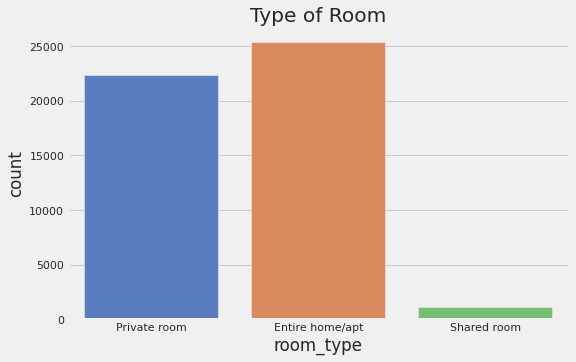

In [ ]:
# Plot the Types of rooms
plt.figure(figsize=(8,5))
plt.title("Type of Room")
sns.countplot(airbnb_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

##### We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

### Let’s see room types occupied by a neighborhood group.

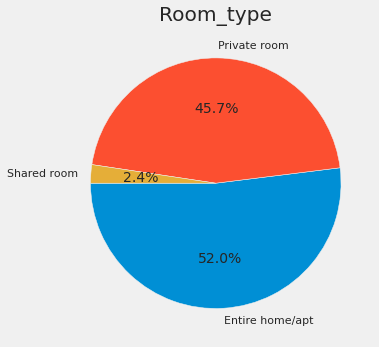

In [ ]:
#plot the types of room occupancy 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,8))
plt.title("Room_type")
g = plt.pie(airbnb_df.room_type.value_counts(), labels=airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

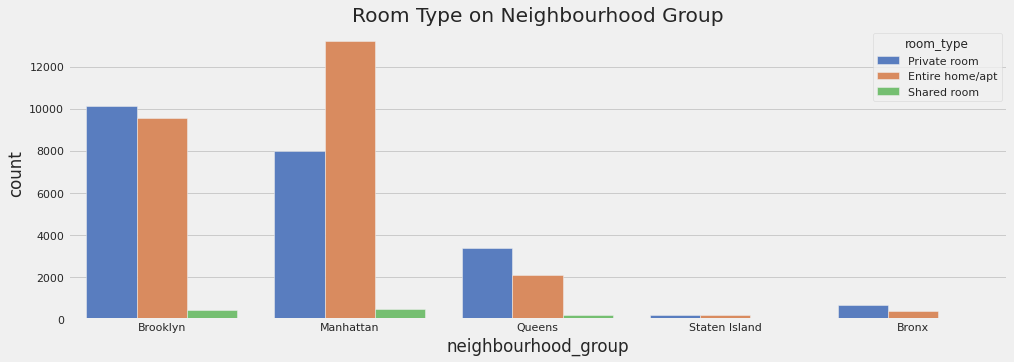

In [ ]:
#Find out the Entire Home/Apartments,Private Rooms and Shared room 
plt.figure(figsize=(15,5))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type, palette="muted")
plt.show()

##### The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

### * Neighbourhood Group vs. Availability Room

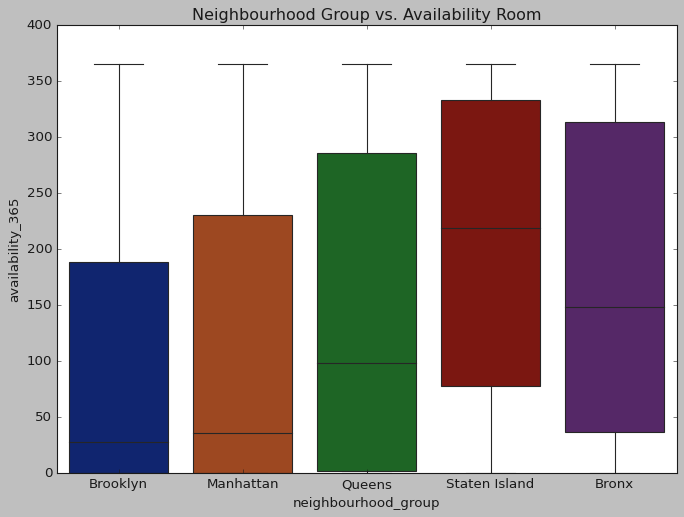

In [ ]:
#Find out the availablity of rooms as per there Neighbourhood
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

#### The graph above shows the relationship between the availability room and neighborhood group.

###  * Neighbourhood Group Price Distribution

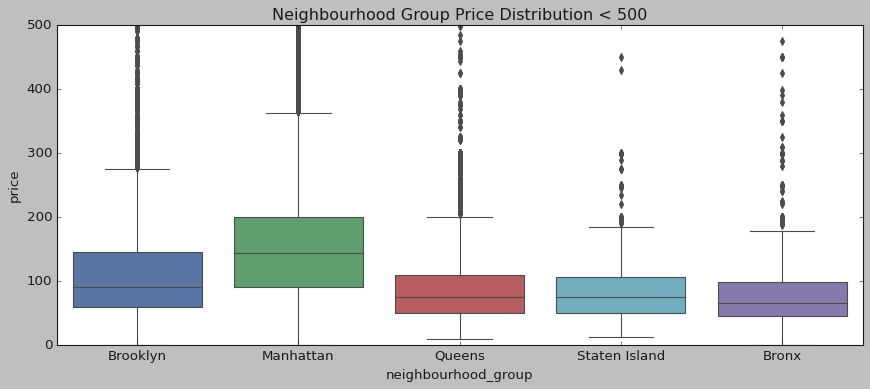

In [ ]:
#Check the Price Distribution as per there Neighbourhood Group
plt.style.use('classic')
plt.figure(figsize=(13,5))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = airbnb_df[airbnb_df.price<500])
plt.show()

##### As the the above plot more or less all are quit similar except Manhattan .It Shows quit higher then others.

### Check the Correlations between the datas

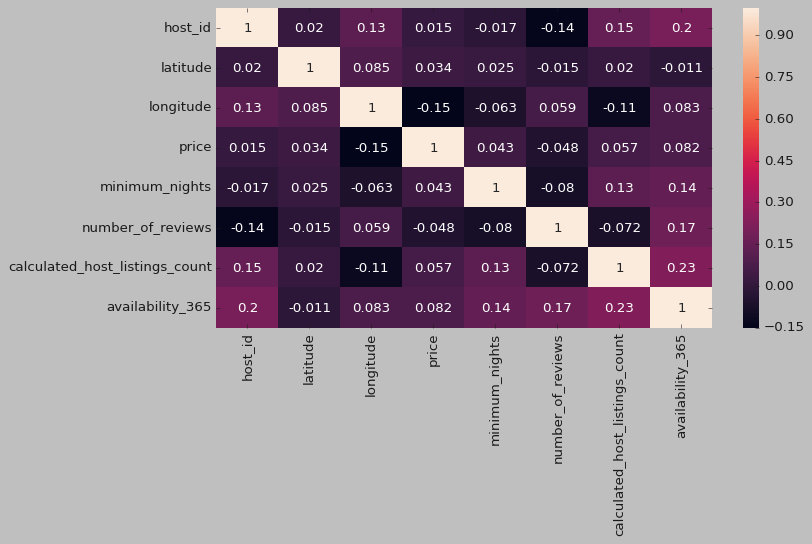

In [ ]:
#Show the correlation 
corr = airbnb_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

Longitude ,Price,Availability_365 are positively highly Correlated. 

## 4.What can we learn about different hosts and areas?

In [ ]:
#Get the hosts list as per the areas
hosts_and_areas= airbnb_df.groupby(['host_name','neighbourhood_group'])["calculated_host_listings_count"].count().reset_index()

In [ ]:
#Display the no. of host as per the area
hosts= hosts_and_areas.sort_values('calculated_host_listings_count',ascending=False).head(10)
hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


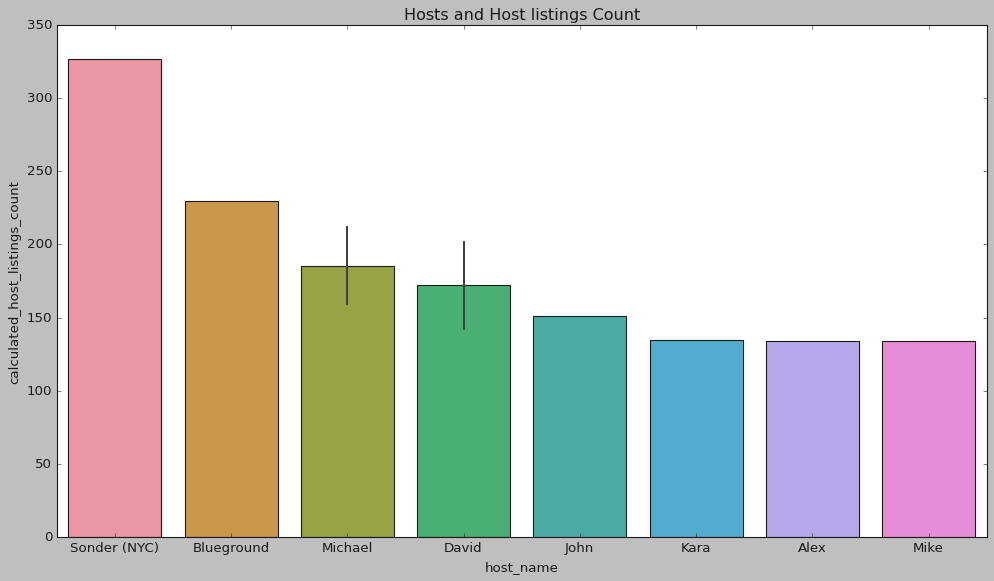

In [ ]:
#plot the host and hosts lists
plt.figure(figsize=(15,8))
sns.barplot(x= hosts['host_name'],y= hosts['calculated_host_listings_count'])
plt.title('Hosts and Host listings Count')
plt.show()


### Here are some intersting findings,we found fascinating:
 * 8 out of top 10 hosts are from the ''Manhattan'' neighbourhood group.

 * 2 out of top 10 hosts are from the ''Brooklyn" neighbourhood group.

 * [ Sonder (NYC), Blueground, Michael, David, John, Kara, Alex, Mike] are the top hosts of Manhattan neighbourhood group.

 * [ Michael,David] are the top hosts in Brooklyn neighbourhood group.

 * Manhattan neighbourhood group hosts are out-performing in listings.

In [ ]:
# Get the Hosts and area as per the price of the rooms
hosts_and_turnover= airbnb_df.groupby(['host_name','neighbourhood_group'])["price"].sum().reset_index()
hosts_turnover= hosts_and_turnover.sort_values('price',ascending=False).head(10)

In [ ]:
hosts_turnover

,host_name,neighbourhood_group,price
13217,Sonder (NYC),Manhattan,82795
1834,Blueground,Manhattan,69741
9742,Michael,Manhattan,42093
3250,David,Manhattan,40366
7275,Kara,Manhattan,35828
11726,Red Awning,Manhattan,35294
432,Alex,Manhattan,30976
12357,Sally,Manhattan,30803
7628,Kevin,Manhattan,29703
6582,Jessica,Brooklyn,26230


### 5) What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
# Get the lowest price with respect to neighbourhood_group,neighbourhood and minimun_nights 
loc_price= airbnb_df.groupby(['name','neighbourhood_group','neighbourhood','price','minimum_nights'])['number_of_reviews'].count().reset_index()
#Display the list in ascending order
top_prices= loc_price.sort_values('price',ascending=False).head(5)

In [ ]:
top_prices

,name,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews
20222,Furnished room in Astoria apartment,Queens,Astoria,10000,100,1
1112,1-BR Lincoln Center,Manhattan,Upper West Side,10000,30,1
27228,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000,5,1
36159,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,9999,99,1
41053,Spanish Harlem Apt,Manhattan,East Harlem,9999,5,1


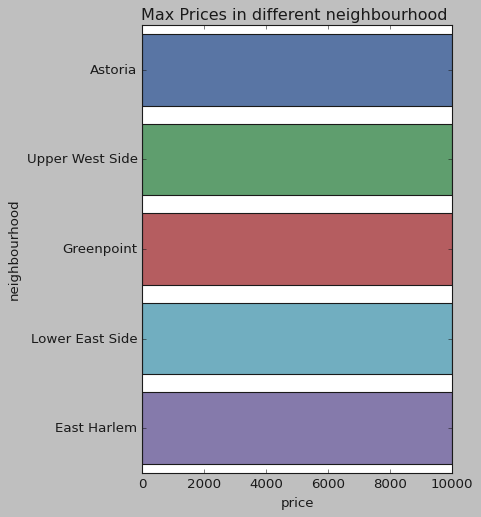

In [ ]:
#Max prices in different neighbourhood
plt.figure(figsize=(5,7))
sns.barplot(x= top_prices['price'],y=top_prices['neighbourhood'])
plt.title('Max Prices in different neighbourhood ')
plt.show()

In [ ]:
#Get the minimum nightsas per the price
m_nights = loc_price.sort_values('price',ascending=False).head(20)

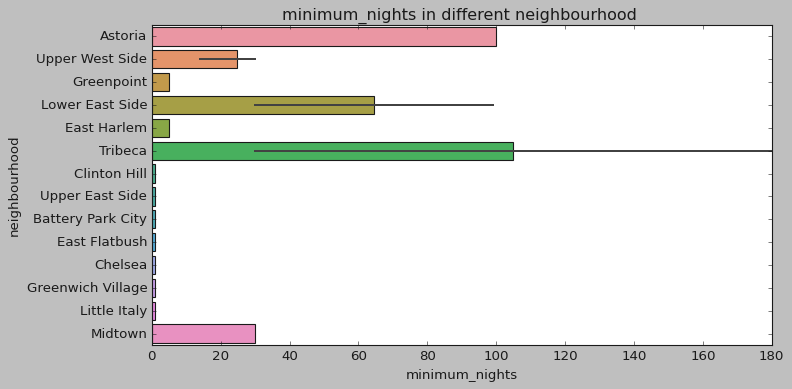

In [ ]:
#Plot the Minimum nights on different neighbourhood
plt.figure(figsize=(10,5))
sns.barplot(x=m_nights['minimum_nights'],y=m_nights['neighbourhood'])
plt.title('minimum_nights in different neighbourhood ')
plt.show()

## Price Vs Location analysis shown some interesting facts:

'''The highest price is 10,000 usd and can be seen in Astoria, Upper west side, lower east side, Greenpoint and East Harlem. most minimum nights spent in top 20 price list are,

 * Luxury TriBeCa Apartment at an amazing price - 180 nights
 * Furnished room in Astoria apartment - 100 nights
 * Quiet, Clean, Lit @ LES & Chinatown - 99 nights
 * highest priced rooms (i.e., 10,000usd) are present in Manhattan, Brooklyn and Queens neighbourhood group'''

In [ ]:
#Get the no.of reviews area wise(neighbour_group)
areas_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


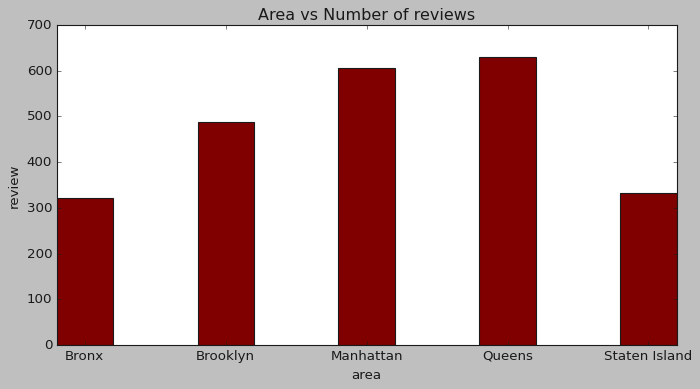

In [ ]:
#plot the no of reviews as per the area
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
#Get the price on the no. of reviews
price_area = airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


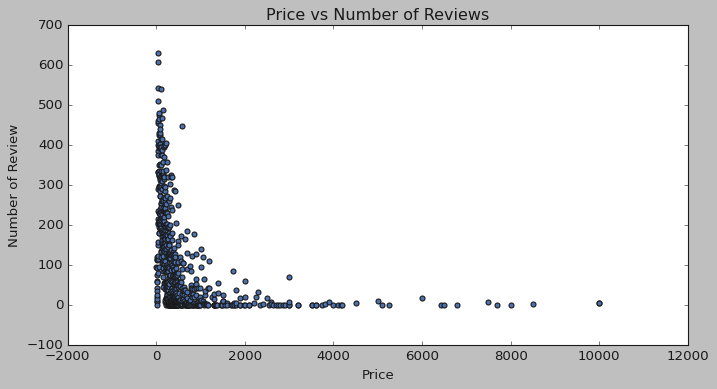

In [ ]:
#plot the price as per the area
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

#### From the above Analysis we can say that most people prefer to stay in place where price is less.

## 6) Which hosts are the busiest and why?

In [ ]:
#Find out the busiest host based on the number of reviews
busiest_hosts = airbnb_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


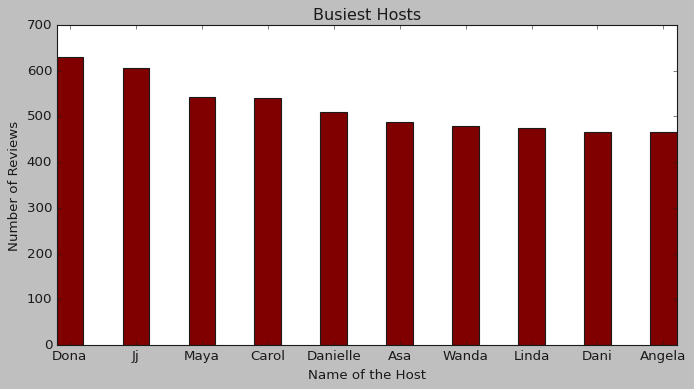

In [ ]:
#Plot the busiest host with no.of reviews
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

### Busiest hosts are:
 * Dona
 * Ji
 * Maya
 * Carol
 * Danielle

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

In [ ]:
#check the types of Rooms
list(airbnb_df['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

## 7) Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
#Get the area traffic on the basis of there neighbourhood_group and type of rooms
traffic_areas= airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traf_area=traffic_areas.sort_values('minimum_nights',ascending=False).head(20)


In [ ]:
traf_area

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


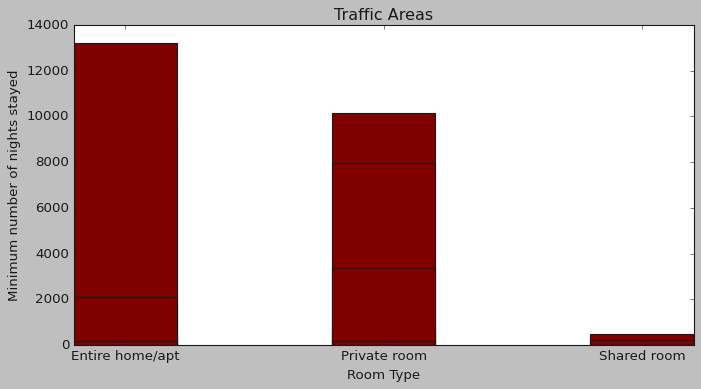

In [ ]:
#Plot the Traffic of area
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

### By the above analysis:
 * 1) In Manhattan, people are preferring "Entire Home/apt".

 * 2) But, in Brooklyn, Queens and Bronx people are preferring private rooms.

 * 3) In staten island, people are having equal preference over all three types of rooms.

From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

## Conclusion:

  1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.

  2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.

  3. Most people prefer to pay less price.

  4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

  5. If people are not staying more then one night means they are travellers.

## Summary:

Airbnb dataset-2019 appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. From the entire analysis on airbnb bookings analysis,Our assumptions before analysis went totally different after getting results from the analysis. The whole EDA process gave very fascinating results and insights that will be helpful for business development and expansion, budget allocations and focussing on things people prefer.italicized text